In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [58]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Reduce data to two dimensions with PCA for visualization purposes
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [59]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

c:\Users\Christopher K. Leal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [60]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


In [61]:
# Predict the class for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [62]:
# Plot decision boundaries and data points
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

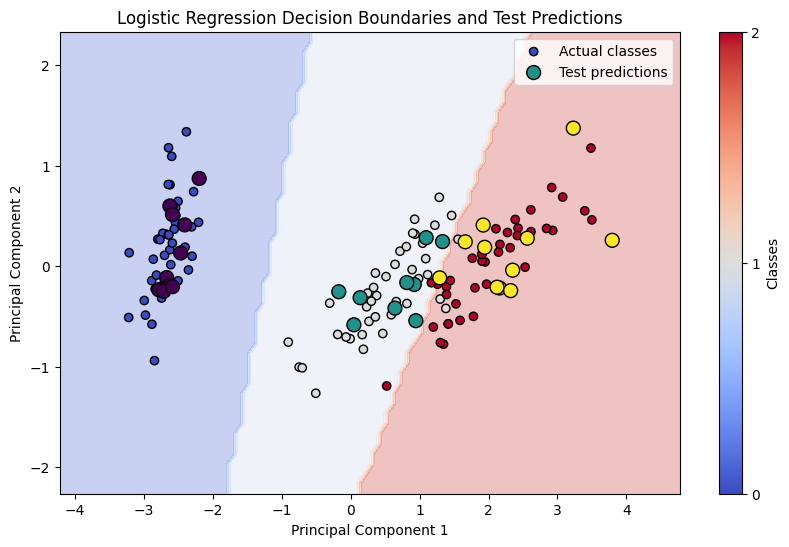

In [63]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the original data points, color-coded by their true class
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm, label='Actual classes')

# Plot test points with predictions (outlined in black to differentiate)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor='k', marker='o', s=100, facecolors='none', label='Test predictions')

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Logistic Regression Decision Boundaries and Test Predictions")
plt.legend()
plt.colorbar(scatter, ticks=[0, 1, 2], label='Classes')
plt.show()
